# How to solve a linear regression problem


In this example, we will learn some of the basic steps in the machine learning life cycle, such as exploratory data analysis, data preparation, model building (in this case, creating a linear regression model and training it), and finally, model evaluation with some performance metrics. There are other steps that are important in the machine learning life cycle as well, but for the purposes of this example, we are going to focus on the mentioned ones.

<!-- ![MLLifeCycle.png](./assets/MLLifeCycle.1.jpeg) -->
<img src="./assets/MLLifeCycle.1.jpeg" width="700" > 

In particular, we will see how to perform the following processes:

1. Import the necessary libraries.
2. Load a data set.
3. Prepare data for modeling.
4. Train a linear regression model.
5. Evaluate the resulting model.

We will use the data set corresponding to the characterization of houses and their price. Our objective is, then, to obtain a model that is capable of predicting the price of a home given its characteristics.

## 1. Import required libraries

We will import the Pandas library and, in addition, we will use the `scikit-learn` library. This library contains multiple functions and objects for all stages in a machine learning process. In particular, we will use:

* Training:
    * `train_test_split`: function for separating the data set into training and testing subsets.
* Modeling: 
    * `LinearRegression`: object to create and train the linear regression model.
* Evaluation: 
    * `mean_squared_error`: function that returns the mean squared error.
    * `mean_absolute_error`: function that returns the mean absolute error.
    * `r2_score`: function that returns the score R<sup>2</sup>.

In [37]:
import pandas as pd
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 2. Data upload

For this example we are going to use a reduced version of the following dataset [House prices dataset](https://www.kaggle.com/datasets/soylevbeytullah/house-prices-dataset) from [https://www.kaggle.com](https://www.kaggle.com):

<a href="https://www.kaggle.com/datasets/soylevbeytullah/house-prices-dataset" ><img src="https://storage.googleapis.com/kaggle-datasets-images/5070513/8497330/ca7e0c022d76baa143e98d6a6ea535e6/dataset-cover.jpg?t=2024-05-23-14-49-47" width="200" ></a>

We will load data using the Pandas [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function. In this case we will add a new parameter to specify the file separator which, for our data set, is a comma:

In [2]:
df_raw = pd.read_csv('data/house_data.csv', sep=',')


We will see the size of the data using `shape`:

In [3]:
df_raw.shape

(21615, 11)

And the first data of the set using `head()`:

In [4]:
df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,yr_built,zipcode
0,7129300520,2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,3.0,1955,98178.0
1,6414100192,2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,3.0,1951,98125.0
2,5631500400,2015,180000.0,2.0,1.00,770.0,10000.0,1.0,3.0,1933,98028.0
3,2487200875,2014,604000.0,4.0,3.00,1960.0,NaN,1.0,5.0,1965,98136.0
4,1954400510,2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,3.0,1987,98074.0


If you noticed the `NaN` value, this means that the data is not clean and there is missing data 🤨. Let's take a look to the data description, for this we will use [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [5]:
df_raw.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,yr_built,zipcode
count,2.161500e+04,21615.000000,2.161300e+04,21614.000000,21614.000000,21614.000000,2.161300e+04,21615.000000,21614.000000,21615.000000,21614.000000
mean,4.580099e+09,2014.322924,5.401063e+05,3.370871,2.114845,2079.898816,1.510725e+04,1.494310,3.409457,1971.004534,98077.940270
std,2.876513e+09,0.467605,3.671369e+05,0.930050,0.770117,918.417120,4.142048e+04,0.539985,0.650740,29.372988,53.504183
min,1.000102e+06,2014.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1900.000000,98001.000000
25%,2.123049e+09,2014.000000,3.219500e+05,3.000000,1.750000,1427.750000,5.040000e+03,1.000000,3.000000,1951.000000,98033.000000
50%,3.904930e+09,2014.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,1975.000000,98065.000000
75%,7.308900e+09,2015.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068900e+04,2.000000,4.000000,1997.000000,98118.000000
max,9.900000e+09,2015.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,2015.000000,98199.000000


Above we can see some statistics about each variable in our dataset.

🧐 Now let's analyze the data using some diagrams. This will provide a clearer view of how the data behaves and how the behavior of these variables influences the price variable:


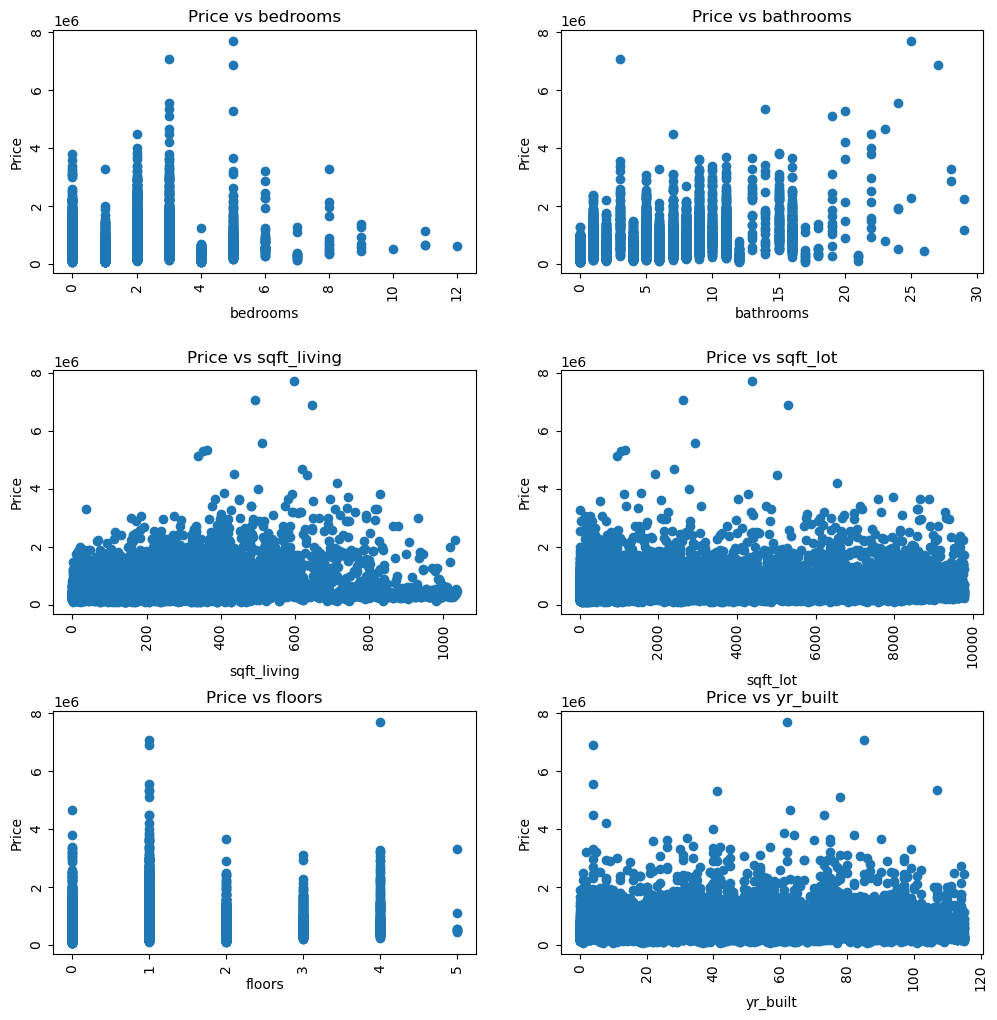

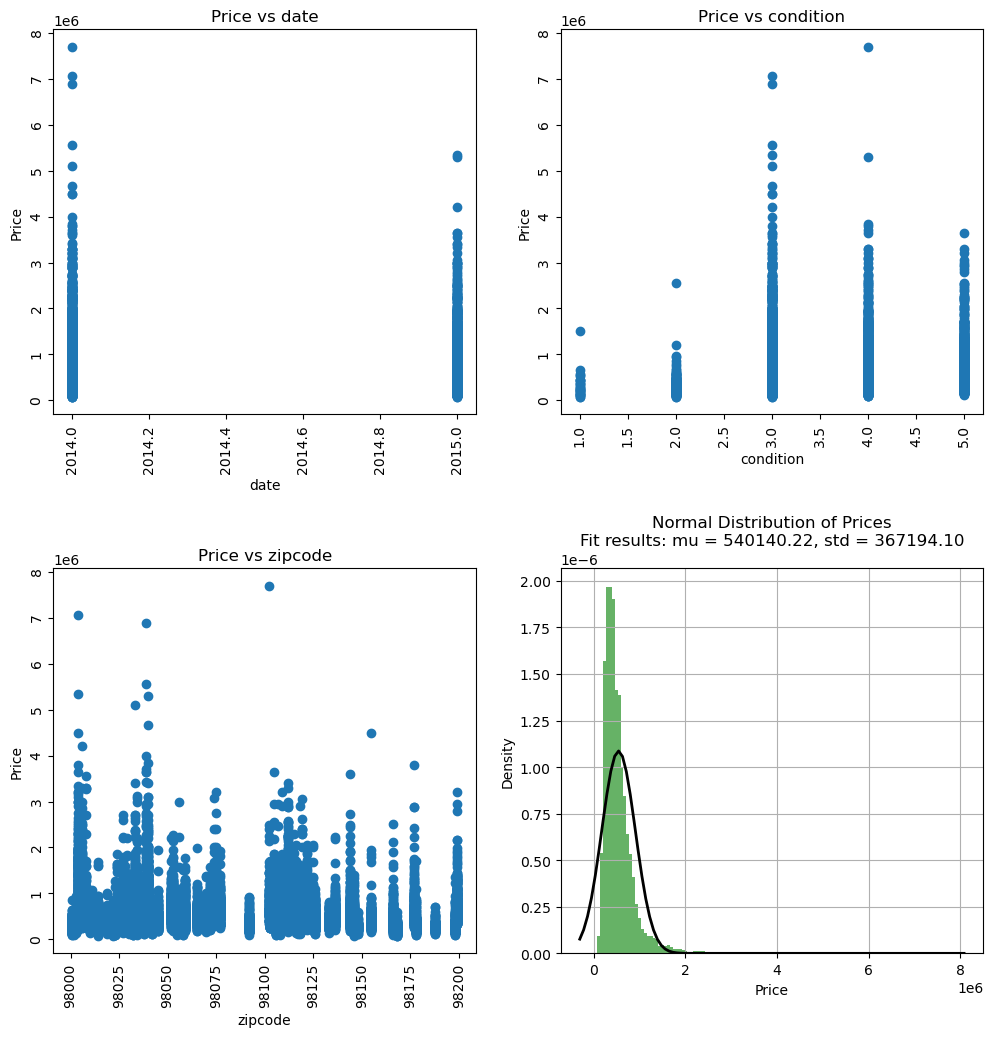

In [59]:
# Ensure inline display of plots in Jupyter notebooks
%matplotlib inline


# x_data_categ includes all columns except 'condition', 'zipcode', 'id', 'date', and 'price'
x_data_categ = df_raw.drop(['condition', 'zipcode', 'id', 'date', 'price'], axis=1)

# x_data_num includes all columns except 'id', 'bathrooms', 'bedrooms', 'sqft_lot', 'sqft_living', 'floors', 'yr_built', and 'price'
x_data_num = df_raw.drop(['id', 'bathrooms', 'bedrooms', 'sqft_lot', 'sqft_living', 'floors', 'yr_built', 'price'], axis=1)

# y_data_price contains the 'price' column
y_data_price = df_raw['price']

# Create subplots with 3 rows and 2 columns, adjust the figure size
figure, axis = plt.subplots(3, 2, figsize=(12, 12))
flattenedAxis = axis.flatten()
plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots

# Initialize a counter for subplot indexing
i = 0
# Iterate over the columns in x_data_categ
for (columnName, columnData) in x_data_categ.items():
    flattenedAxis[i].set_title('Price vs ' + str(columnName))  # Set the title of the subplot
    flattenedAxis[i].scatter(columnData.astype(str), y_data_price)  # Create a scatter plot
    flattenedAxis[i].set_xlabel(str(columnName))  # Set the x-axis label
    flattenedAxis[i].set_ylabel('Price')  # Set the y-axis label
    flattenedAxis[i].set_xscale('linear')  # Set the x-axis scale to linear
    flattenedAxis[i].tick_params(labelrotation=90)  # Rotate x-axis labels for better readability
    i += 1  # Increment the counter

plt.show()  # Display the plot

# Create another set of subplots with 2 rows and 2 columns, adjust the figure size
figure2, axis2 = plt.subplots(2, 2, figsize=(12, 12))
flattenedAxis2 = axis2.flatten()
plt.subplots_adjust(hspace=0.4)  # Adjust the space between subplots

# Initialize a counter for subplot indexing
i = 0
# Iterate over the columns in x_data_num
for (columnName, columnData) in x_data_num.items():
    flattenedAxis2[i].set_title('Price vs ' + columnName)  # Set the title of the subplot
    flattenedAxis2[i].scatter(columnData, y_data_price)  # Create a scatter plot
    flattenedAxis2[i].set_xlabel(columnName)  # Set the x-axis label
    flattenedAxis2[i].set_ylabel('Price')  # Set the y-axis label
    flattenedAxis2[i].tick_params(labelrotation=90)  # Rotate x-axis labels for better readability
    i += 1  # Increment the counter

# Plot the histogram of the 'price' column
count, bins, ignored = plt.hist(y_data_price, bins=120, density=True, alpha=0.6, color='g')

# Fit a normal distribution to the 'price' data
mu, std = norm.fit(y_data_price)

# Generate x values for the normal distribution plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the normal distribution on the last subplot
flattenedAxis2[3].plot(x, p, 'k', linewidth=2)
flattenedAxis2[3].set_title('Price Distribution')  # Set the title of the subplot

# Add titles and labels to the normal distribution plot
title = f"Fit results: mu = {mu:.2f}, std = {std:.2f}"
flattenedAxis2[3].set_title('Normal Distribution of Prices\n' + title)
flattenedAxis2[3].set_xlabel('Price')  # Set the x-axis label
flattenedAxis2[3].set_ylabel('Density')  # Set the y-axis label
flattenedAxis2[3].grid(True)  # Enable the grid

plt.show()  # Display the plot


As we can observe, there are a lot of outlier values present in almost all the diagrams, and `price` vs `date` doesn't seem to offer much information. All these factors can affect how well-fitted a linear regression model is for this data. Additionally, we don't need to draw 'id' vs 'Price' since this variable doesn't affect the price and will be removed from the training process.


## 3. Data preparation

Before training any machine learning model, it is important to ensure that the data used does not contain errors, such as missing or duplicate data. For this it is advisable to use a new variable, in this case `data`, which we will use to store a set of modified data:

In [7]:
data = df_raw

### Delete missing data

Usually, the data obtained from real processes or scenarios is not perfect. For example, there may be cases where some values are not saved, are not measured or are not stored correctly. In these cases, it must be evaluated if it is possible to replace the value (using average values, for example) or if, on the contrary, it is simply better to delete the entire data (that is, the entire row).

Using the `isna()` function on our DataFrame, we will obtain the evaluation of a particular conditional, which returns `True` if the cell is empty. With Pandas, a cell is considered "empty" if its value is `NaN` or an invalid numeric value (`numpy.NaN`). It is important to note that a cell with an empty String (`''`) is not considered empty, so `isna()` would return `False` in that case 

In [8]:
data.isna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,yr_built,zipcode
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
21610,False,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,False
21612,False,False,False,False,False,False,False,False,False,False,False
21613,False,False,False,False,False,False,False,False,False,False,False


If we add the `sum()` function, we will obtain the amount of missing data per variable:

In [9]:
data.isna().sum()

id             0
date           0
price          2
bedrooms       1
bathrooms      1
sqft_living    1
sqft_lot       2
floors         0
condition      1
yr_built       0
zipcode        1
dtype: int64

Remember that it is always necessary to check if the data has missing values, since we must deal with them before training the model. **For simplicity purposes of this example, we are going to delete the rows that contain missing data**. 

⚠️ **In reality for missing data issues it’s recommended to use data imputing techniques instead. We will explain some of this techniques in the following examples.** ⚠️

For removing the rows containing missing data use [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [10]:
data.dropna(inplace=True) 
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,yr_built,zipcode
0,7129300520,2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,3.0,1955,98178.0
1,6414100192,2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,3.0,1951,98125.0
2,5631500400,2015,180000.0,2.0,1.00,770.0,10000.0,1.0,3.0,1933,98028.0
4,1954400510,2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,3.0,1987,98074.0
5,7237550310,2014,1225000.0,4.0,4.50,5420.0,101930.0,1.0,3.0,2001,98053.0
...,...,...,...,...,...,...,...,...,...,...,...
21610,1523300141,2014,402101.0,2.0,0.75,1020.0,1350.0,2.0,3.0,2009,98144.0
21611,291310100,2015,400000.0,3.0,2.50,1600.0,2388.0,2.0,3.0,2004,98027.0
21612,1523300157,2014,325000.0,2.0,0.75,1020.0,1076.0,2.0,3.0,2008,98144.0
21613,2818100255,2014,922000.0,4.0,2.50,2620.0,14126.0,1.0,4.0,1941,98117.0


😱 Wow it was a lot of missing data! Helpfully this is just a simple example and we have enough rows 😅. Let's take a look to our data after the cleaning. 

In [11]:
data.isna().sum()

id             0
date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
condition      0
yr_built       0
zipcode        0
dtype: int64

Looking nice 🙂!

### Duplicate removal

Another possible error that can happen in a set is the repetition of data (in the case of a DataFrame, it would be repeated rows). The main problem is that, if we have a lot of repeated data when training, the resulting model will not be able to generalize correctly when evaluating new data, but will be overfitting or biased toward duplicate data.

Similar to the previous case, we will use the `duplicated()` function to obtain the result of a special query, which returns `True` if the row is a copy of another. Specifically, this function checks the rows in order, returning ` False` if we see a row for the first time. If we ever encounter a row we have already seen, it will mark the current row as `True`, but will do nothing with the original row. This is the result in our data set: 

In [12]:
data.duplicated()

0        False
1        False
2        False
4        False
5        False
         ...  
21610    False
21611    False
21612    False
21613     True
21614     True
Length: 21606, dtype: bool

If we add `sum()`, we will get the number of duplicate rows:

In [13]:
data.duplicated().sum()

4

There are some duplicated values as well, to remove those we will use [`drop_duplicates()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

In [14]:
data.drop_duplicates(inplace=True)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,yr_built,zipcode
0,7129300520,2014,221900.0,3.0,1.00,1180.0,5650.0,1.0,3.0,1955,98178.0
1,6414100192,2014,538000.0,3.0,2.25,2570.0,7242.0,2.0,3.0,1951,98125.0
2,5631500400,2015,180000.0,2.0,1.00,770.0,10000.0,1.0,3.0,1933,98028.0
4,1954400510,2015,510000.0,3.0,2.00,1680.0,8080.0,1.0,3.0,1987,98074.0
5,7237550310,2014,1225000.0,4.0,4.50,5420.0,101930.0,1.0,3.0,2001,98053.0
...,...,...,...,...,...,...,...,...,...,...,...
21607,2997800021,2015,475000.0,3.0,2.50,1310.0,1294.0,2.0,3.0,2008,98116.0
21609,6600060120,2015,400000.0,4.0,2.50,2310.0,5813.0,2.0,3.0,2014,98146.0
21610,1523300141,2014,402101.0,2.0,0.75,1020.0,1350.0,2.0,3.0,2009,98144.0
21611,291310100,2015,400000.0,3.0,2.50,1600.0,2388.0,2.0,3.0,2004,98027.0


Let's take a look to the duplicates again

In [15]:
data.duplicated().sum()

0

Much better! 🙂

### Elimination of irrelevant variables

When training a linear regression model, we look for a relationship between the target variable and the independent variables. However, we must consider the context of our data, in order to avoid creating relationships that are not relevant to the problem, or maintaining variables that give redundant information. For this example, we will eliminate three variables with little relevance to home prices: `id`, `date`, `condition` and `zipcode`.

To remove them, we will use the [`drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) function on our DataFrame and assign the result to itself, overwriting its contents. Note that the `axis=1` parameter indicates that we will perform this action on the columns:

In [16]:
data = data.drop(['id', 'date', 'condition', 'zipcode'], axis=1)

We will see the result with `data.head()`:

In [17]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,1955
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,1951
2,180000.0,2.0,1.00,770.0,10000.0,1.0,1933
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,1987
5,1225000.0,4.0,4.50,5420.0,101930.0,1.0,2001


## 4. Training a linear regression model

With the data prepared, we can now train our linear regression model. The first thing we will do is divide it into two subsets and then train the model.

### Data Splitting 

First we have to divide the resulting data set into two: one used for training and one used for testing. we can decide what proportion of data to assign to each set, for example, for this model we will use 80% of the data for train the model and the remaining 20% to test it. Specifically, we will use the [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function with the following parameters: 

* `arrays`: the array (or arrays) of data. In this case it is our variable `data`.
* `test_size=0.2`: the proportion of test data. It must be a value between 0 and 1. Since we want 20%, we will use the value `0.2`.
* `random_state=7`: The seed used to rearrange the data, represented by an integer. Using the same seed will always give the same result, rather than being completely random.

In [18]:
train, test = train_test_split(data, test_size=0.2, random_state=7)
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
15529,1100000.0,4.0,2.75,3410.0,7750.0,1.0,1958
11627,425000.0,3.0,1.50,1570.0,12412.0,1.0,1954
17171,250000.0,3.0,2.50,1730.0,7200.0,2.0,1985
15456,100000.0,2.0,1.00,910.0,22000.0,1.0,1956
9543,490000.0,4.0,4.25,4480.0,5715.0,2.0,2003



💡For more Information about data splitting with `train_test_split()` we can consult [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

It is important to highlight that, for the supervised algorithms implemented in `scikit-learn`, it is necessary that the input variables be separated from the target variable. In this case our target variable is the price, so we will isolate it from the others .

For this we will use the `drop` function and assign the result to `x_train`, which represents the values of the independent variables of the training set. On the other hand, we will assign the same column that we eliminated to another variable, `y_train`, which represents the values of the dependent variable of the training set:

In [19]:
x_train = train.drop(['price'],axis=1)
y_train = train['price']

We can verify that our vector of variables X does not contain the variable `price`:

In [20]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
15529,4.0,2.75,3410.0,7750.0,1.0,1958
11627,3.0,1.50,1570.0,12412.0,1.0,1954
17171,3.0,2.50,1730.0,7200.0,2.0,1985
15456,2.0,1.00,910.0,22000.0,1.0,1956
9543,4.0,4.25,4480.0,5715.0,2.0,2003


In addition, we will verify that our variable Y only contains the prices:

In [21]:
y_train.head()

15529    1100000.0
11627     425000.0
17171     250000.0
15456     100000.0
9543      490000.0
Name: price, dtype: float64

### Model training

Now we can train the model with the modified data. Initially we will create an object of type `LinearRegression()`:

In [22]:
regression = LinearRegression()

💡For more information about linear regression with `LinearRegression()` we can consult [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Next we train the model using the training set, which we previously separated into the independent variables `x_train` and the target variable `y_train`:

In [23]:
regression.fit(x_train,y_train)

LinearRegression()

The result of the training is the coefficients and the intercept that define a line. Remember that there is a coefficient for each variable, which defines a proportional relationship between it and the target variable:

In [24]:
print ('Coefficients: ', regression.coef_)
print('Intercept: ', regression.intercept_)

Coefficients:  [-7.33560245e+04  6.89191966e+04  3.04432988e+02 -3.32956794e-01
  5.30720978e+04 -3.36473485e+03]
Intercept:  6564966.346671897


We can see what coefficient corresponds to each variable using the `zip()` method, which returns tuples with the elements of each parameter. In this case, we will use the name of the variables (which we will obtain using the `columns` attribute of the variable `x_train`) and the regression coefficients, and we will create a list with the result using the `list()` method:

In [25]:
list(zip(x_train.columns, regression.coef_))

[('bedrooms', -73356.02452161735),
 ('bathrooms', 68919.19655840984),
 ('sqft_living', 304.43298816804236),
 ('sqft_lot', -0.3329567941618734),
 ('floors', 53072.097773076),
 ('yr_built', -3364.734845855929)]

For example, the variable `bathrooms` has an associated coefficient of 68919.19, and the variable `sqft_lot` has an associated coefficient of -0.332.

## 5. Model evaluation

Evaluation metrics will allow us to determine how well a model performs, that is, how it fits the data. The first thing we will do is divide our test set in the same way as we divide the training set. It is That is, we will detach the target variable using `drop()`, and assign this variable to `y_test`:

In [26]:
x_test = test.drop(['price'],axis=1)
y_test = test['price']

🔮 Time to make predictions!

Next we will make predictions on the test set, in order to compare them with the real values that we store in `y_test`. We will use the `predict()` function on the model, passing as parameters the values of the dependent variables of the set of tests `x_test`. That is, for each data, we will give the model the values of the independent variables, and the model will return a value of the target variable calculated with the coefficients and the intercept:

In [27]:
y_pred = regression.predict(x_test)

Now the resulting array of predictions `y_pred ` will be useful for us to calculate the following metrics:

1. **Root Mean Squared Error (RMSE):** 
we will use `mean_squared_error()` and pass the actual data and predictions as parameters. The `squared` parameter allows us to choose between the root mean squared error (which has units square of the data passed by parameter, in this case USD<sup>2</sup>) and its root (which has the same units of the data passed by parameter, in this case USD).
2. **Mean absolute error (MAE):** 
we will use `mean_absolute_error()` and pass the actual data and predictions as parameters.
3. **Coefficient of determination (R<sup>2</sup>):** 
we will use `r2_score()`, with the same data as in the previous metrics.

In [28]:

print("Root Mean Squared Error (RMSE): %.3f" % mean_squared_error(y_test, y_pred, squared=False))
print("Mean absolute error (MAE): %.3f" % mean_absolute_error(y_test, y_pred))
print('Coefficient of determination (R²): %.3f' % r2_score(y_test, y_pred))

Root Mean Squared Error (RMSE): 243722.612
Mean absolute error (MAE): 158207.778
Coefficient of determination (R²): 0.564


Based on these metrics, we can say that the root mean squared error in the predictions is 243,722.61 USD, and that the average absolute error in the predictions is 158,207.77 USD. An average error in the order ofhundreds of  thousands of dollars may seem very high, although our R<sup>2</sup> tells us that our model fits the data by 56%, which is ok.

💡For more information about errors in `scikit_learn` we can see: [RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html), [MAE]( https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) and [R2](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

Once the generalization performance has been determined using the test set, we can take all the data and train the final model. We will follow the same procedure, first isolating the target variable:

In [29]:
x = data.drop(['price'],axis=1)
y = data['price']

We will use the same linear regression object to train the model:

In [30]:
regression.fit(x,y)

LinearRegression()

And we will obtain the coefficients and the intercept of the final model:

In [31]:
print ('Coefficients: ', regression.coef_)
print('Intercept: ', regression.intercept_)

Coefficients:  [-6.85059555e+04  6.74747118e+04  3.03272948e+02 -2.98332996e-01
  5.39961084e+04 -3.36602818e+03]
Intercept:  6555817.452519993


Finally, we will see what coefficient corresponds to each variable:

In [32]:
list(zip(x.columns, regression.coef_))

[('bedrooms', -68505.95551306363),
 ('bathrooms', 67474.71180657033),
 ('sqft_living', 303.2729475015112),
 ('sqft_lot', -0.29833299623714993),
 ('floors', 53996.108433078945),
 ('yr_built', -3366.0281753454983)]

## Conclusion

- In this example we have learned some of the basic steps in the machine learning life cycle. We also used Pandas to prepare our data set, so that we can train a linear regression model using scikit-learn. Additionally we use some numpy and scipy libraries. 

- We made predictions with the resulting model and calculate three performance metrics on the results. 

- As expected, we obtained an R² of 56%. This means there is room for improvement, and we might consider fine-tuning the regression model by reducing the dimensions, trying different combinations of variables, or using another type of regression that fits the data better.

